# Librairy

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Exctraction data

In [72]:
base_url = "https://books.toscrape.com/catalogue/"
main_url = "https://books.toscrape.com/catalogue/page-{}.html"

In [73]:
def get_soup(url):
    print(f"Fetching URL: {url}")
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch URL: {url}, Status code: {response.status_code}")
        return None
    return BeautifulSoup(response.text, 'html.parser')

In [74]:
def extract_category(book_url):
    print(f"Extracting category from book URL: {book_url}")
    soup = get_soup(book_url)
    if soup is None:
        return None
    breadcrumb = soup.find('ul', class_='breadcrumb')
    category = breadcrumb.find_all('li')[2].a.text  # La troisième entrée est la catégorie
    return category

In [75]:
def extract_book_data(article):
    title = article.h3.a['title']
    book_url = base_url + article.h3.a['href']
    print(f"Extracting data for book: {title}")
    price = article.find('p', class_='price_color').text
    availability = article.find('p', class_='instock availability').text.strip()
    star_rating = article.find('p', class_='star-rating')['class'][1]  # Extrait la classe de la note d'étoiles
    
    # Convertir le nombre d'étoiles en chiffre
    star_dict = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    stars = star_dict[star_rating]
    
    # Extraire la catégorie du livre
    category = extract_category(book_url)
    if category is None:
        category = "Unknown"
    
    return {
        'title': title,
        'link': book_url,
        'price': price,
        'availability': availability,
        'stars': stars,
        'category': category
    }

In [76]:
books = []

In [77]:
page_number = 1
max_books = 1000
max_pages = 50

In [78]:
while len(books) < max_books and page_number <= max_pages:
    print(f"Scraping page {page_number}")
    url = main_url.format(page_number)
    
    soup = get_soup(url)
    if soup is None:
        print(f"Stopping scraping as soup is None for URL: {url}")
        break
    
    articles = soup.find_all('article', class_='product_pod')
    
    if not articles:
        print(f"No articles found on page {page_number}")
        break
    
    for article in articles:
        if len(books) >= max_books:
            print(f"Reached the maximum number of books: {max_books}")
            break
        book_data = extract_book_data(article)
        books.append(book_data)
        print(f"Book added: {book_data['title']}")
    
    page_number += 1

Scraping page 1
Fetching URL: https://books.toscrape.com/catalogue/page-1.html
Extracting data for book: A Light in the Attic
Extracting category from book URL: https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
Book added: A Light in the Attic
Extracting data for book: Tipping the Velvet
Extracting category from book URL: https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
Fetching URL: https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
Book added: Tipping the Velvet
Extracting data for book: Soumission
Extracting category from book URL: https://books.toscrape.com/catalogue/soumission_998/index.html
Fetching URL: https://books.toscrape.com/catalogue/soumission_998/index.html
Book added: Soumission
Extracting data for book: Sharp Objects
Extracting category from book URL: https://books.toscrape.com/catalogue/sharp-objects_997/index.html
F

Book added: Chase Me (Paris Nights #2)
Extracting data for book: Black Dust
Extracting category from book URL: https://books.toscrape.com/catalogue/black-dust_976/index.html
Fetching URL: https://books.toscrape.com/catalogue/black-dust_976/index.html
Book added: Black Dust
Extracting data for book: Birdsong: A Story in Pictures
Extracting category from book URL: https://books.toscrape.com/catalogue/birdsong-a-story-in-pictures_975/index.html
Fetching URL: https://books.toscrape.com/catalogue/birdsong-a-story-in-pictures_975/index.html
Book added: Birdsong: A Story in Pictures
Extracting data for book: America's Cradle of Quarterbacks: Western Pennsylvania's Football Factory from Johnny Unitas to Joe Montana
Extracting category from book URL: https://books.toscrape.com/catalogue/americas-cradle-of-quarterbacks-western-pennsylvanias-football-factory-from-johnny-unitas-to-joe-montana_974/index.html
Fetching URL: https://books.toscrape.com/catalogue/americas-cradle-of-quarterbacks-western-

Book added: Unseen City: The Majesty of Pigeons, the Discreet Charm of Snails & Other Wonders of the Urban Wilderness
Extracting data for book: Unicorn Tracks
Extracting category from book URL: https://books.toscrape.com/catalogue/unicorn-tracks_951/index.html
Fetching URL: https://books.toscrape.com/catalogue/unicorn-tracks_951/index.html
Book added: Unicorn Tracks
Extracting data for book: Unbound: How Eight Technologies Made Us Human, Transformed Society, and Brought Our World to the Brink
Extracting category from book URL: https://books.toscrape.com/catalogue/unbound-how-eight-technologies-made-us-human-transformed-society-and-brought-our-world-to-the-brink_950/index.html
Fetching URL: https://books.toscrape.com/catalogue/unbound-how-eight-technologies-made-us-human-transformed-society-and-brought-our-world-to-the-brink_950/index.html
Book added: Unbound: How Eight Technologies Made Us Human, Transformed Society, and Brought Our World to the Brink
Extracting data for book: Tsubasa:

Book added: The Electric Pencil: Drawings from Inside State Hospital No. 3
Extracting data for book: The Death of Humanity: and the Case for Life
Extracting category from book URL: https://books.toscrape.com/catalogue/the-death-of-humanity-and-the-case-for-life_932/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-death-of-humanity-and-the-case-for-life_932/index.html
Book added: The Death of Humanity: and the Case for Life
Extracting data for book: The Bulletproof Diet: Lose up to a Pound a Day, Reclaim Energy and Focus, Upgrade Your Life
Extracting category from book URL: https://books.toscrape.com/catalogue/the-bulletproof-diet-lose-up-to-a-pound-a-day-reclaim-energy-and-focus-upgrade-your-life_931/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-bulletproof-diet-lose-up-to-a-pound-a-day-reclaim-energy-and-focus-upgrade-your-life_931/index.html
Book added: The Bulletproof Diet: Lose up to a Pound a Day, Reclaim Energy and Focus, Upgrade Your Life
Ext

Book added: Online Marketing for Busy Authors: A Step-By-Step Guide
Extracting data for book: On a Midnight Clear
Extracting category from book URL: https://books.toscrape.com/catalogue/on-a-midnight-clear_912/index.html
Fetching URL: https://books.toscrape.com/catalogue/on-a-midnight-clear_912/index.html
Book added: On a Midnight Clear
Extracting data for book: Obsidian (Lux #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/obsidian-lux-1_911/index.html
Fetching URL: https://books.toscrape.com/catalogue/obsidian-lux-1_911/index.html
Book added: Obsidian (Lux #1)
Extracting data for book: My Paris Kitchen: Recipes and Stories
Extracting category from book URL: https://books.toscrape.com/catalogue/my-paris-kitchen-recipes-and-stories_910/index.html
Fetching URL: https://books.toscrape.com/catalogue/my-paris-kitchen-recipes-and-stories_910/index.html
Book added: My Paris Kitchen: Recipes and Stories
Extracting data for book: Masks and Shadows
Extracting category

Book added: Everydata: The Misinformation Hidden in the Little Data You Consume Every Day
Extracting data for book: Don't Be a Jerk: And Other Practical Advice from Dogen, Japan's Greatest Zen Master
Extracting category from book URL: https://books.toscrape.com/catalogue/dont-be-a-jerk-and-other-practical-advice-from-dogen-japans-greatest-zen-master_890/index.html
Fetching URL: https://books.toscrape.com/catalogue/dont-be-a-jerk-and-other-practical-advice-from-dogen-japans-greatest-zen-master_890/index.html
Book added: Don't Be a Jerk: And Other Practical Advice from Dogen, Japan's Greatest Zen Master
Extracting data for book: Danganronpa Volume 1
Extracting category from book URL: https://books.toscrape.com/catalogue/danganronpa-volume-1_889/index.html
Fetching URL: https://books.toscrape.com/catalogue/danganronpa-volume-1_889/index.html
Book added: Danganronpa Volume 1
Extracting data for book: Crown of Midnight (Throne of Glass #2)
Extracting category from book URL: https://books.to

Book added: Tracing Numbers on a Train
Extracting data for book: Throne of Glass (Throne of Glass #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/throne-of-glass-throne-of-glass-1_868/index.html
Fetching URL: https://books.toscrape.com/catalogue/throne-of-glass-throne-of-glass-1_868/index.html
Book added: Throne of Glass (Throne of Glass #1)
Extracting data for book: Thomas Jefferson and the Tripoli Pirates: The Forgotten War That Changed American History
Extracting category from book URL: https://books.toscrape.com/catalogue/thomas-jefferson-and-the-tripoli-pirates-the-forgotten-war-that-changed-american-history_867/index.html
Fetching URL: https://books.toscrape.com/catalogue/thomas-jefferson-and-the-tripoli-pirates-the-forgotten-war-that-changed-american-history_867/index.html
Book added: Thomas Jefferson and the Tripoli Pirates: The Forgotten War That Changed American History
Extracting data for book: Thirteen Reasons Why
Extracting category from book UR

Book added: The House by the Lake
Extracting data for book: The Glittering Court (The Glittering Court #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-glittering-court-the-glittering-court-1_845/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-glittering-court-the-glittering-court-1_845/index.html
Book added: The Glittering Court (The Glittering Court #1)
Extracting data for book: The Girl on the Train
Extracting category from book URL: https://books.toscrape.com/catalogue/the-girl-on-the-train_844/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-girl-on-the-train_844/index.html
Book added: The Girl on the Train
Extracting data for book: The Genius of Birds
Extracting category from book URL: https://books.toscrape.com/catalogue/the-genius-of-birds_843/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-genius-of-birds_843/index.html
Book added: The Genius of Birds
Extracting data for book: The Emerald Myste

Book added: Nightingale, Sing
Extracting data for book: Night Sky with Exit Wounds
Extracting category from book URL: https://books.toscrape.com/catalogue/night-sky-with-exit-wounds_822/index.html
Fetching URL: https://books.toscrape.com/catalogue/night-sky-with-exit-wounds_822/index.html
Book added: Night Sky with Exit Wounds
Extracting data for book: Mrs. Houdini
Extracting category from book URL: https://books.toscrape.com/catalogue/mrs-houdini_821/index.html
Fetching URL: https://books.toscrape.com/catalogue/mrs-houdini_821/index.html
Book added: Mrs. Houdini
Scraping page 10
Fetching URL: https://books.toscrape.com/catalogue/page-10.html
Extracting data for book: Modern Romance
Extracting category from book URL: https://books.toscrape.com/catalogue/modern-romance_820/index.html
Fetching URL: https://books.toscrape.com/catalogue/modern-romance_820/index.html
Book added: Modern Romance
Extracting data for book: Miss Peregrineâs Home for Peculiar Children (Miss Peregrineâs Peculi

Book added: Daring Greatly: How the Courage to Be Vulnerable Transforms the Way We Live, Love, Parent, and Lead
Extracting data for book: Close to You
Extracting category from book URL: https://books.toscrape.com/catalogue/close-to-you_798/index.html
Fetching URL: https://books.toscrape.com/catalogue/close-to-you_798/index.html
Book added: Close to You
Extracting data for book: Chasing Heaven: What Dying Taught Me About Living
Extracting category from book URL: https://books.toscrape.com/catalogue/chasing-heaven-what-dying-taught-me-about-living_797/index.html
Fetching URL: https://books.toscrape.com/catalogue/chasing-heaven-what-dying-taught-me-about-living_797/index.html
Book added: Chasing Heaven: What Dying Taught Me About Living
Extracting data for book: Big Magic: Creative Living Beyond Fear
Extracting category from book URL: https://books.toscrape.com/catalogue/big-magic-creative-living-beyond-fear_796/index.html
Fetching URL: https://books.toscrape.com/catalogue/big-magic-creat

Book added: Until Friday Night (The Field Party #1)
Extracting data for book: Unbroken: A World War II Story of Survival, Resilience, and Redemption
Extracting category from book URL: https://books.toscrape.com/catalogue/unbroken-a-world-war-ii-story-of-survival-resilience-and-redemption_774/index.html
Fetching URL: https://books.toscrape.com/catalogue/unbroken-a-world-war-ii-story-of-survival-resilience-and-redemption_774/index.html
Book added: Unbroken: A World War II Story of Survival, Resilience, and Redemption
Extracting data for book: Twenty Yawns
Extracting category from book URL: https://books.toscrape.com/catalogue/twenty-yawns_773/index.html
Fetching URL: https://books.toscrape.com/catalogue/twenty-yawns_773/index.html
Book added: Twenty Yawns
Extracting data for book: Through the Woods
Extracting category from book URL: https://books.toscrape.com/catalogue/through-the-woods_772/index.html
Fetching URL: https://books.toscrape.com/catalogue/through-the-woods_772/index.html
Boo

Book added: The Guilty (Will Robie #4)
Extracting data for book: The First Hostage (J.B. Collins #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-first-hostage-jb-collins-2_749/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-first-hostage-jb-collins-2_749/index.html
Book added: The First Hostage (J.B. Collins #2)
Extracting data for book: The Dovekeepers
Extracting category from book URL: https://books.toscrape.com/catalogue/the-dovekeepers_748/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-dovekeepers_748/index.html
Book added: The Dovekeepers
Extracting data for book: The Darkest Lie
Extracting category from book URL: https://books.toscrape.com/catalogue/the-darkest-lie_747/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-darkest-lie_747/index.html
Book added: The Darkest Lie
Extracting data for book: The Bane Chronicles (The Bane Chronicles #1-11)
Extracting category from book URL: https://books.tos

Book added: Overload: How to Unplug, Unwind, and Unleash Yourself from the Pressure of Stress
Extracting data for book: Once Was a Time
Extracting category from book URL: https://books.toscrape.com/catalogue/once-was-a-time_724/index.html
Fetching URL: https://books.toscrape.com/catalogue/once-was-a-time_724/index.html
Book added: Once Was a Time
Extracting data for book: Old School (Diary of a Wimpy Kid #10)
Extracting category from book URL: https://books.toscrape.com/catalogue/old-school-diary-of-a-wimpy-kid-10_723/index.html
Fetching URL: https://books.toscrape.com/catalogue/old-school-diary-of-a-wimpy-kid-10_723/index.html
Book added: Old School (Diary of a Wimpy Kid #10)
Extracting data for book: No Dream Is Too High: Life Lessons From a Man Who Walked on the Moon
Extracting category from book URL: https://books.toscrape.com/catalogue/no-dream-is-too-high-life-lessons-from-a-man-who-walked-on-the-moon_722/index.html
Fetching URL: https://books.toscrape.com/catalogue/no-dream-is-t

Book added: Hyperbole and a Half: Unfortunate Situations, Flawed Coping Mechanisms, Mayhem, and Other Things That Happened
Extracting data for book: Hush, Hush (Hush, Hush #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/hush-hush-hush-hush-1_701/index.html
Fetching URL: https://books.toscrape.com/catalogue/hush-hush-hush-hush-1_701/index.html
Book added: Hush, Hush (Hush, Hush #1)
Scraping page 16
Fetching URL: https://books.toscrape.com/catalogue/page-16.html
Extracting data for book: Hold Your Breath (Search and Rescue #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/hold-your-breath-search-and-rescue-1_700/index.html
Fetching URL: https://books.toscrape.com/catalogue/hold-your-breath-search-and-rescue-1_700/index.html
Book added: Hold Your Breath (Search and Rescue #1)
Extracting data for book: Hamilton: The Revolution
Extracting category from book URL: https://books.toscrape.com/catalogue/hamilton-the-revolution_699/index.html


Book added: City of Glass (The Mortal Instruments #3)
Extracting data for book: City of Fallen Angels (The Mortal Instruments #4)
Extracting category from book URL: https://books.toscrape.com/catalogue/city-of-fallen-angels-the-mortal-instruments-4_677/index.html
Fetching URL: https://books.toscrape.com/catalogue/city-of-fallen-angels-the-mortal-instruments-4_677/index.html
Book added: City of Fallen Angels (The Mortal Instruments #4)
Extracting data for book: City of Bones (The Mortal Instruments #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/city-of-bones-the-mortal-instruments-1_676/index.html
Fetching URL: https://books.toscrape.com/catalogue/city-of-bones-the-mortal-instruments-1_676/index.html
Book added: City of Bones (The Mortal Instruments #1)
Extracting data for book: City of Ashes (The Mortal Instruments #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/city-of-ashes-the-mortal-instruments-2_675/index.html
Fetching URL: 

Book added: A People's History of the United States
Extracting data for book: A Man Called Ove
Extracting category from book URL: https://books.toscrape.com/catalogue/a-man-called-ove_653/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-man-called-ove_653/index.html
Book added: A Man Called Ove
Extracting data for book: A Distant Mirror: The Calamitous 14th Century
Extracting category from book URL: https://books.toscrape.com/catalogue/a-distant-mirror-the-calamitous-14th-century_652/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-distant-mirror-the-calamitous-14th-century_652/index.html
Book added: A Distant Mirror: The Calamitous 14th Century
Extracting data for book: A Brush of Wings (Angels Walking #3)
Extracting category from book URL: https://books.toscrape.com/catalogue/a-brush-of-wings-angels-walking-3_651/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-brush-of-wings-angels-walking-3_651/index.html
Book added: A Brush of Wings (An

Book added: Snatched: How A Drug Queen Went Undercover for the DEA and Was Kidnapped By Colombian Guerillas
Extracting data for book: Raspberry Pi Electronics Projects for the Evil Genius
Extracting category from book URL: https://books.toscrape.com/catalogue/raspberry-pi-electronics-projects-for-the-evil-genius_630/index.html
Fetching URL: https://books.toscrape.com/catalogue/raspberry-pi-electronics-projects-for-the-evil-genius_630/index.html
Book added: Raspberry Pi Electronics Projects for the Evil Genius
Extracting data for book: Quench Your Own Thirst: Business Lessons Learned Over a Beer or Two
Extracting category from book URL: https://books.toscrape.com/catalogue/quench-your-own-thirst-business-lessons-learned-over-a-beer-or-two_629/index.html
Fetching URL: https://books.toscrape.com/catalogue/quench-your-own-thirst-business-lessons-learned-over-a-beer-or-two_629/index.html
Book added: Quench Your Own Thirst: Business Lessons Learned Over a Beer or Two
Extracting data for book

Book added: The Sleep Revolution: Transforming Your Life, One Night at a Time
Extracting data for book: The Improbability of Love
Extracting category from book URL: https://books.toscrape.com/catalogue/the-improbability-of-love_607/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-improbability-of-love_607/index.html
Book added: The Improbability of Love
Extracting data for book: The Art of Startup Fundraising
Extracting category from book URL: https://books.toscrape.com/catalogue/the-art-of-startup-fundraising_606/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-art-of-startup-fundraising_606/index.html
Book added: The Art of Startup Fundraising
Extracting data for book: Take Me Home Tonight (Rock Star Romance #3)
Extracting category from book URL: https://books.toscrape.com/catalogue/take-me-home-tonight-rock-star-romance-3_605/index.html
Fetching URL: https://books.toscrape.com/catalogue/take-me-home-tonight-rock-star-romance-3_605/index.html
Book ad

Book added: 10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works
Extracting data for book: 10-Day Green Smoothie Cleanse: Lose Up to 15 Pounds in 10 Days!
Extracting category from book URL: https://books.toscrape.com/catalogue/10-day-green-smoothie-cleanse-lose-up-to-15-pounds-in-10-days_581/index.html
Fetching URL: https://books.toscrape.com/catalogue/10-day-green-smoothie-cleanse-lose-up-to-15-pounds-in-10-days_581/index.html
Book added: 10-Day Green Smoothie Cleanse: Lose Up to 15 Pounds in 10 Days!
Scraping page 22
Fetching URL: https://books.toscrape.com/catalogue/page-22.html
Extracting data for book: Without Shame
Extracting category from book URL: https://books.toscrape.com/catalogue/without-shame_580/index.html
Fetching URL: https://books.toscrape.com/catalogue/without-shame_580/index.html
Book added: Without Shame
Extracting data for book: Watchmen
Extracting category from book URL: https://books.toscrap

Book added: Art and Fear: Observations on the Perils (and Rewards) of Artmaking
Extracting data for book: A Shard of Ice (The Black Symphony Saga #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/a-shard-of-ice-the-black-symphony-saga-1_558/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-shard-of-ice-the-black-symphony-saga-1_558/index.html
Book added: A Shard of Ice (The Black Symphony Saga #1)
Extracting data for book: A Hero's Curse (The Unseen Chronicles #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/a-heros-curse-the-unseen-chronicles-1_557/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-heros-curse-the-unseen-chronicles-1_557/index.html
Book added: A Hero's Curse (The Unseen Chronicles #1)
Extracting data for book: 23 Degrees South: A Tropical Tale of Changing Whether...
Extracting category from book URL: https://books.toscrape.com/catalogue/23-degrees-south-a-tropical-tale-of-changing-whether_

Book added: Out of Print: City Lights Spotlight No. 14
Extracting data for book: My Life Next Door (My Life Next Door )
Extracting category from book URL: https://books.toscrape.com/catalogue/my-life-next-door-my-life-next-door_535/index.html
Fetching URL: https://books.toscrape.com/catalogue/my-life-next-door-my-life-next-door_535/index.html
Book added: My Life Next Door (My Life Next Door )
Extracting data for book: Miller's Valley
Extracting category from book URL: https://books.toscrape.com/catalogue/millers-valley_534/index.html
Fetching URL: https://books.toscrape.com/catalogue/millers-valley_534/index.html
Book added: Miller's Valley
Extracting data for book: Man's Search for Meaning
Extracting category from book URL: https://books.toscrape.com/catalogue/mans-search-for-meaning_533/index.html
Fetching URL: https://books.toscrape.com/catalogue/mans-search-for-meaning_533/index.html
Book added: Man's Search for Meaning
Extracting data for book: Love That Boy: What Two Presidents, 

Book added: Between the World and Me
Extracting data for book: Being Mortal: Medicine and What Matters in the End
Extracting category from book URL: https://books.toscrape.com/catalogue/being-mortal-medicine-and-what-matters-in-the-end_512/index.html
Fetching URL: https://books.toscrape.com/catalogue/being-mortal-medicine-and-what-matters-in-the-end_512/index.html
Book added: Being Mortal: Medicine and What Matters in the End
Extracting data for book: A Murder Over a Girl: Justice, Gender, Junior High
Extracting category from book URL: https://books.toscrape.com/catalogue/a-murder-over-a-girl-justice-gender-junior-high_511/index.html
Fetching URL: https://books.toscrape.com/catalogue/a-murder-over-a-girl-justice-gender-junior-high_511/index.html
Book added: A Murder Over a Girl: Justice, Gender, Junior High
Extracting data for book: 32 Yolks
Extracting category from book URL: https://books.toscrape.com/catalogue/32-yolks_510/index.html
Fetching URL: https://books.toscrape.com/catalogue

Book added: The Art Book
Extracting data for book: The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change
Extracting category from book URL: https://books.toscrape.com/catalogue/the-7-habits-of-highly-effective-people-powerful-lessons-in-personal-change_489/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-7-habits-of-highly-effective-people-powerful-lessons-in-personal-change_489/index.html
Book added: The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change
Extracting data for book: Team of Rivals: The Political Genius of Abraham Lincoln
Extracting category from book URL: https://books.toscrape.com/catalogue/team-of-rivals-the-political-genius-of-abraham-lincoln_488/index.html
Fetching URL: https://books.toscrape.com/catalogue/team-of-rivals-the-political-genius-of-abraham-lincoln_488/index.html
Book added: Team of Rivals: The Political Genius of Abraham Lincoln
Extracting data for book: Steal Like an Artist: 10 Things Nobody 

Book added: Finding God in the Ruins: How God Redeems Pain
Extracting data for book: Every Heart a Doorway (Every Heart A Doorway #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/every-heart-a-doorway-every-heart-a-doorway-1_465/index.html
Fetching URL: https://books.toscrape.com/catalogue/every-heart-a-doorway-every-heart-a-doorway-1_465/index.html
Book added: Every Heart a Doorway (Every Heart A Doorway #1)
Extracting data for book: Delivering the Truth (Quaker Midwife Mystery #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/delivering-the-truth-quaker-midwife-mystery-1_464/index.html
Fetching URL: https://books.toscrape.com/catalogue/delivering-the-truth-quaker-midwife-mystery-1_464/index.html
Book added: Delivering the Truth (Quaker Midwife Mystery #1)
Extracting data for book: Counted With the Stars (Out from Egypt #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/counted-with-the-stars-out-from-egypt-

Book added: The God Delusion
Extracting data for book: The Girl You Left Behind (The Girl You Left Behind #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-girl-you-left-behind-the-girl-you-left-behind-1_443/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-girl-you-left-behind-the-girl-you-left-behind-1_443/index.html
Book added: The Girl You Left Behind (The Girl You Left Behind #1)
Extracting data for book: The Fellowship of the Ring (The Lord of the Rings #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-fellowship-of-the-ring-the-lord-of-the-rings-1_442/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-fellowship-of-the-ring-the-lord-of-the-rings-1_442/index.html
Book added: The Fellowship of the Ring (The Lord of the Rings #1)
Extracting data for book: The Collected Poems of W.B. Yeats (The Collected Works of W.B. Yeats #1)
Extracting category from book URL: https://books.toscrape.com/cata

Book added: Will Grayson, Will Grayson (Will Grayson, Will Grayson)
Extracting data for book: Why Save the Bankers?: And Other Essays on Our Economic and Political Crisis
Extracting category from book URL: https://books.toscrape.com/catalogue/why-save-the-bankers-and-other-essays-on-our-economic-and-political-crisis_418/index.html
Fetching URL: https://books.toscrape.com/catalogue/why-save-the-bankers-and-other-essays-on-our-economic-and-political-crisis_418/index.html
Book added: Why Save the Bankers?: And Other Essays on Our Economic and Political Crisis
Extracting data for book: Where She Went (If I Stay #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/where-she-went-if-i-stay-2_417/index.html
Fetching URL: https://books.toscrape.com/catalogue/where-she-went-if-i-stay-2_417/index.html
Book added: Where She Went (If I Stay #2)
Extracting data for book: What If?: Serious Scientific Answers to Absurd Hypothetical Questions
Extracting category from book URL: h

Book added: Talking to Girls About Duran Duran: One Young Man's Quest for True Love and a Cooler Haircut
Extracting data for book: Siddhartha
Extracting category from book URL: https://books.toscrape.com/catalogue/siddhartha_393/index.html
Fetching URL: https://books.toscrape.com/catalogue/siddhartha_393/index.html
Book added: Siddhartha
Extracting data for book: Shiver (The Wolves of Mercy Falls #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/shiver-the-wolves-of-mercy-falls-1_392/index.html
Fetching URL: https://books.toscrape.com/catalogue/shiver-the-wolves-of-mercy-falls-1_392/index.html
Book added: Shiver (The Wolves of Mercy Falls #1)
Extracting data for book: Remember Me?
Extracting category from book URL: https://books.toscrape.com/catalogue/remember-me_391/index.html
Fetching URL: https://books.toscrape.com/catalogue/remember-me_391/index.html
Book added: Remember Me?
Extracting data for book: Red Dragon (Hannibal Lecter #1)
Extracting category from

Book added: Dracula the Un-Dead
Extracting data for book: Digital Fortress
Extracting category from book URL: https://books.toscrape.com/catalogue/digital-fortress_369/index.html
Fetching URL: https://books.toscrape.com/catalogue/digital-fortress_369/index.html
Book added: Digital Fortress
Extracting data for book: Death Note, Vol. 5: Whiteout (Death Note #5)
Extracting category from book URL: https://books.toscrape.com/catalogue/death-note-vol-5-whiteout-death-note-5_368/index.html
Fetching URL: https://books.toscrape.com/catalogue/death-note-vol-5-whiteout-death-note-5_368/index.html
Book added: Death Note, Vol. 5: Whiteout (Death Note #5)
Extracting data for book: Data, A Love Story: How I Gamed Online Dating to Meet My Match
Extracting category from book URL: https://books.toscrape.com/catalogue/data-a-love-story-how-i-gamed-online-dating-to-meet-my-match_367/index.html
Fetching URL: https://books.toscrape.com/catalogue/data-a-love-story-how-i-gamed-online-dating-to-meet-my-match_3

Book added: The Geography of Bliss: One Grump's Search for the Happiest Places in the World
Extracting data for book: The Demonists (Demonist #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-demonists-demonist-1_345/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-demonists-demonist-1_345/index.html
Book added: The Demonists (Demonist #1)
Extracting data for book: The Demon Prince of Momochi House, Vol. 4 (The Demon Prince of Momochi House #4)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-demon-prince-of-momochi-house-vol-4-the-demon-prince-of-momochi-house-4_344/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-demon-prince-of-momochi-house-vol-4-the-demon-prince-of-momochi-house-4_344/index.html
Book added: The Demon Prince of Momochi House, Vol. 4 (The Demon Prince of Momochi House #4)
Extracting data for book: The Bone Hunters (Lexy Vaughan & Steven Macaulay #2)
Extracting category from bo

Book added: God Is Not Great: How Religion Poisons Everything
Extracting data for book: Girl With a Pearl Earring
Extracting category from book URL: https://books.toscrape.com/catalogue/girl-with-a-pearl-earring_322/index.html
Fetching URL: https://books.toscrape.com/catalogue/girl-with-a-pearl-earring_322/index.html
Book added: Girl With a Pearl Earring
Extracting data for book: Fruits Basket, Vol. 4 (Fruits Basket #4)
Extracting category from book URL: https://books.toscrape.com/catalogue/fruits-basket-vol-4-fruits-basket-4_321/index.html
Fetching URL: https://books.toscrape.com/catalogue/fruits-basket-vol-4-fruits-basket-4_321/index.html
Book added: Fruits Basket, Vol. 4 (Fruits Basket #4)
Scraping page 35
Fetching URL: https://books.toscrape.com/catalogue/page-35.html
Extracting data for book: Far From True (Promise Falls Trilogy #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/far-from-true-promise-falls-trilogy-2_320/index.html
Fetching URL: https://boo

Book added: Very Good Lives: The Fringe Benefits of Failure and the Importance of Imagination
Extracting data for book: Vegan Vegetarian Omnivore: Dinner for Everyone at the Table
Extracting category from book URL: https://books.toscrape.com/catalogue/vegan-vegetarian-omnivore-dinner-for-everyone-at-the-table_297/index.html
Fetching URL: https://books.toscrape.com/catalogue/vegan-vegetarian-omnivore-dinner-for-everyone-at-the-table_297/index.html
Book added: Vegan Vegetarian Omnivore: Dinner for Everyone at the Table
Extracting data for book: Unstuffed: Decluttering Your Home, Mind, and Soul
Extracting category from book URL: https://books.toscrape.com/catalogue/unstuffed-decluttering-your-home-mind-and-soul_296/index.html
Fetching URL: https://books.toscrape.com/catalogue/unstuffed-decluttering-your-home-mind-and-soul_296/index.html
Book added: Unstuffed: Decluttering Your Home, Mind, and Soul
Extracting data for book: Under the Banner of Heaven: A Story of Violent Faith
Extracting ca

Book added: The Restaurant at the End of the Universe (Hitchhiker's Guide to the Galaxy #2)
Extracting data for book: The Rest Is Noise: Listening to the Twentieth Century
Extracting category from book URL: https://books.toscrape.com/catalogue/the-rest-is-noise-listening-to-the-twentieth-century_274/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-rest-is-noise-listening-to-the-twentieth-century_274/index.html
Book added: The Rest Is Noise: Listening to the Twentieth Century
Extracting data for book: The Red Tent
Extracting category from book URL: https://books.toscrape.com/catalogue/the-red-tent_273/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-red-tent_273/index.html
Book added: The Red Tent
Extracting data for book: The Purpose Driven Life: What on Earth Am I Here for?
Extracting category from book URL: https://books.toscrape.com/catalogue/the-purpose-driven-life-what-on-earth-am-i-here-for_272/index.html
Fetching URL: https://books.toscrape.com/

Book added: The Girl with All the Gifts
Extracting data for book: The Girl Who Played with Fire (Millennium Trilogy #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-girl-who-played-with-fire-millennium-trilogy-2_249/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-girl-who-played-with-fire-millennium-trilogy-2_249/index.html
Book added: The Girl Who Played with Fire (Millennium Trilogy #2)
Extracting data for book: The Girl Who Kicked the Hornet's Nest (Millennium Trilogy #3)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-girl-who-kicked-the-hornets-nest-millennium-trilogy-3_248/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-girl-who-kicked-the-hornets-nest-millennium-trilogy-3_248/index.html
Book added: The Girl Who Kicked the Hornet's Nest (Millennium Trilogy #3)
Extracting data for book: The Exiled
Extracting category from book URL: https://books.toscrape.com/catalogue/the-exiled_247/inde

Book added: The Art of Simple Food: Notes, Lessons, and Recipes from a Delicious Revolution
Extracting data for book: The Art of Fielding
Extracting category from book URL: https://books.toscrape.com/catalogue/the-art-of-fielding_228/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-art-of-fielding_228/index.html
Book added: The Art of Fielding
Extracting data for book: Surely You're Joking, Mr. Feynman!: Adventures of a Curious Character
Extracting category from book URL: https://books.toscrape.com/catalogue/surely-youre-joking-mr-feynman-adventures-of-a-curious-character_227/index.html
Fetching URL: https://books.toscrape.com/catalogue/surely-youre-joking-mr-feynman-adventures-of-a-curious-character_227/index.html
Book added: Surely You're Joking, Mr. Feynman!: Adventures of a Curious Character
Extracting data for book: Stiff: The Curious Lives of Human Cadavers
Extracting category from book URL: https://books.toscrape.com/catalogue/stiff-the-curious-lives-of-human-ca

Book added: Packing for Mars: The Curious Science of Life in the Void
Extracting data for book: Outliers: The Story of Success
Extracting category from book URL: https://books.toscrape.com/catalogue/outliers-the-story-of-success_204/index.html
Fetching URL: https://books.toscrape.com/catalogue/outliers-the-story-of-success_204/index.html
Book added: Outliers: The Story of Success
Extracting data for book: Original Fake
Extracting category from book URL: https://books.toscrape.com/catalogue/original-fake_203/index.html
Fetching URL: https://books.toscrape.com/catalogue/original-fake_203/index.html
Book added: Original Fake
Extracting data for book: Orange Is the New Black
Extracting category from book URL: https://books.toscrape.com/catalogue/orange-is-the-new-black_202/index.html
Fetching URL: https://books.toscrape.com/catalogue/orange-is-the-new-black_202/index.html
Book added: Orange Is the New Black
Extracting data for book: One for the Money (Stephanie Plum #1)
Extracting category

Book added: Jurassic Park (Jurassic Park #1)
Extracting data for book: It's Never Too Late to Begin Again: Discovering Creativity and Meaning at Midlife and Beyond
Extracting category from book URL: https://books.toscrape.com/catalogue/its-never-too-late-to-begin-again-discovering-creativity-and-meaning-at-midlife-and-beyond_179/index.html
Fetching URL: https://books.toscrape.com/catalogue/its-never-too-late-to-begin-again-discovering-creativity-and-meaning-at-midlife-and-beyond_179/index.html
Book added: It's Never Too Late to Begin Again: Discovering Creativity and Meaning at Midlife and Beyond
Extracting data for book: Is Everyone Hanging Out Without Me? (And Other Concerns)
Extracting category from book URL: https://books.toscrape.com/catalogue/is-everyone-hanging-out-without-me-and-other-concerns_178/index.html
Fetching URL: https://books.toscrape.com/catalogue/is-everyone-hanging-out-without-me-and-other-concerns_178/index.html
Book added: Is Everyone Hanging Out Without Me? (And

Book added: Fifty Shades Freed (Fifty Shades #3)
Extracting data for book: Fellside
Extracting category from book URL: https://books.toscrape.com/catalogue/fellside_155/index.html
Fetching URL: https://books.toscrape.com/catalogue/fellside_155/index.html
Book added: Fellside
Extracting data for book: Extreme Prey (Lucas Davenport #26)
Extracting category from book URL: https://books.toscrape.com/catalogue/extreme-prey-lucas-davenport-26_154/index.html
Fetching URL: https://books.toscrape.com/catalogue/extreme-prey-lucas-davenport-26_154/index.html
Book added: Extreme Prey (Lucas Davenport #26)
Extracting data for book: Eragon (The Inheritance Cycle #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/eragon-the-inheritance-cycle-1_153/index.html
Fetching URL: https://books.toscrape.com/catalogue/eragon-the-inheritance-cycle-1_153/index.html
Book added: Eragon (The Inheritance Cycle #1)
Extracting data for book: Eclipse (Twilight #3)
Extracting category from book 

Book added: Black Butler, Vol. 1 (Black Butler #1)
Extracting data for book: Big Little Lies
Extracting category from book URL: https://books.toscrape.com/catalogue/big-little-lies_129/index.html
Fetching URL: https://books.toscrape.com/catalogue/big-little-lies_129/index.html
Book added: Big Little Lies
Extracting data for book: Between Shades of Gray
Extracting category from book URL: https://books.toscrape.com/catalogue/between-shades-of-gray_128/index.html
Fetching URL: https://books.toscrape.com/catalogue/between-shades-of-gray_128/index.html
Book added: Between Shades of Gray
Extracting data for book: Best of My Love (Fool's Gold #20)
Extracting category from book URL: https://books.toscrape.com/catalogue/best-of-my-love-fools-gold-20_127/index.html
Fetching URL: https://books.toscrape.com/catalogue/best-of-my-love-fools-gold-20_127/index.html
Book added: Best of My Love (Fool's Gold #20)
Extracting data for book: Beowulf
Extracting category from book URL: https://books.toscrape.

Book added: Kindle Paperwhite User's Guide
Extracting data for book: H is for Hawk
Extracting category from book URL: https://books.toscrape.com/catalogue/h-is-for-hawk_102/index.html
Fetching URL: https://books.toscrape.com/catalogue/h-is-for-hawk_102/index.html
Book added: H is for Hawk
Extracting data for book: Girl Online On Tour (Girl Online #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/girl-online-on-tour-girl-online-2_101/index.html
Fetching URL: https://books.toscrape.com/catalogue/girl-online-on-tour-girl-online-2_101/index.html
Book added: Girl Online On Tour (Girl Online #2)
Scraping page 46
Fetching URL: https://books.toscrape.com/catalogue/page-46.html
Extracting data for book: Fruits Basket, Vol. 2 (Fruits Basket #2)
Extracting category from book URL: https://books.toscrape.com/catalogue/fruits-basket-vol-2-fruits-basket-2_100/index.html
Fetching URL: https://books.toscrape.com/catalogue/fruits-basket-vol-2-fruits-basket-2_100/index.html
Book

Book added: The Republic
Extracting data for book: The Odyssey
Extracting category from book URL: https://books.toscrape.com/catalogue/the-odyssey_77/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-odyssey_77/index.html
Book added: The Odyssey
Extracting data for book: The No. 1 Ladies' Detective Agency (No. 1 Ladies' Detective Agency #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/the-no-1-ladies-detective-agency-no-1-ladies-detective-agency-1_76/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-no-1-ladies-detective-agency-no-1-ladies-detective-agency-1_76/index.html
Book added: The No. 1 Ladies' Detective Agency (No. 1 Ladies' Detective Agency #1)
Extracting data for book: The Nicomachean Ethics
Extracting category from book URL: https://books.toscrape.com/catalogue/the-nicomachean-ethics_75/index.html
Fetching URL: https://books.toscrape.com/catalogue/the-nicomachean-ethics_75/index.html
Book added: The Nicomachean Ethic

Book added: Settling the Score (The Summer Games #1)
Extracting data for book: Sense and Sensibility
Extracting category from book URL: https://books.toscrape.com/catalogue/sense-and-sensibility_49/index.html
Fetching URL: https://books.toscrape.com/catalogue/sense-and-sensibility_49/index.html
Book added: Sense and Sensibility
Extracting data for book: Saga, Volume 1 (Saga (Collected Editions) #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/saga-volume-1-saga-collected-editions-1_48/index.html
Fetching URL: https://books.toscrape.com/catalogue/saga-volume-1-saga-collected-editions-1_48/index.html
Book added: Saga, Volume 1 (Saga (Collected Editions) #1)
Extracting data for book: Rhythm, Chord & Malykhin
Extracting category from book URL: https://books.toscrape.com/catalogue/rhythm-chord-malykhin_47/index.html
Fetching URL: https://books.toscrape.com/catalogue/rhythm-chord-malykhin_47/index.html
Book added: Rhythm, Chord & Malykhin
Extracting data for book: 

Book added: Having the Barbarian's Baby (Ice Planet Barbarians #7.5)
Extracting data for book: Giant Days, Vol. 1 (Giant Days #1-4)
Extracting category from book URL: https://books.toscrape.com/catalogue/giant-days-vol-1-giant-days-1-4_22/index.html
Fetching URL: https://books.toscrape.com/catalogue/giant-days-vol-1-giant-days-1-4_22/index.html
Book added: Giant Days, Vol. 1 (Giant Days #1-4)
Extracting data for book: Fruits Basket, Vol. 1 (Fruits Basket #1)
Extracting category from book URL: https://books.toscrape.com/catalogue/fruits-basket-vol-1-fruits-basket-1_21/index.html
Fetching URL: https://books.toscrape.com/catalogue/fruits-basket-vol-1-fruits-basket-1_21/index.html
Book added: Fruits Basket, Vol. 1 (Fruits Basket #1)
Scraping page 50
Fetching URL: https://books.toscrape.com/catalogue/page-50.html
Extracting data for book: Frankenstein
Extracting category from book URL: https://books.toscrape.com/catalogue/frankenstein_20/index.html
Fetching URL: https://books.toscrape.com/c

In [79]:
df = pd.DataFrame(books)
df

,title,link,price,availability,stars,category
0,A Light in the Attic,https://books.toscrape.com/catalogue/a-light-i...,Â£51.77,In stock,3,Poetry
1,Tipping the Velvet,https://books.toscrape.com/catalogue/tipping-t...,Â£53.74,In stock,1,Historical Fiction
2,Soumission,https://books.toscrape.com/catalogue/soumissio...,Â£50.10,In stock,1,Fiction
3,Sharp Objects,https://books.toscrape.com/catalogue/sharp-obj...,Â£47.82,In stock,4,Mystery
4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/catalogue/sapiens-a...,Â£54.23,In stock,5,History
...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,https://books.toscrape.com/catalogue/alice-in-...,Â£55.53,In stock,1,Classics
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",https://books.toscrape.com/catalogue/ajin-demi...,Â£57.06,In stock,4,Sequential Art
997,A Spy's Devotion (The Regency Spies of London #1),https://books.toscrape.com/catalogue/a-spys-de...,Â£16.97,In stock,5,Historical Fiction
998,1st to Die (Women's Murder Club #1),https://books.toscrape.com/catalogue/1st-to-di...,Â£53.98,In stock,1,Mystery


In [80]:
df = df.drop(columns=['link'])
df

,title,price,availability,stars,category
0,A Light in the Attic,Â£51.77,In stock,3,Poetry
1,Tipping the Velvet,Â£53.74,In stock,1,Historical Fiction
2,Soumission,Â£50.10,In stock,1,Fiction
3,Sharp Objects,Â£47.82,In stock,4,Mystery
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,5,History
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,1,Classics
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,4,Sequential Art
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,5,Historical Fiction
998,1st to Die (Women's Murder Club #1),Â£53.98,In stock,1,Mystery


In [81]:
df['price'] = df['price'].str.replace('Â£', '').astype(float)
df

,title,price,availability,stars,category
0,A Light in the Attic,51.77,In stock,3,Poetry
1,Tipping the Velvet,53.74,In stock,1,Historical Fiction
2,Soumission,50.10,In stock,1,Fiction
3,Sharp Objects,47.82,In stock,4,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,History
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,1,Classics
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,4,Sequential Art
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,5,Historical Fiction
998,1st to Die (Women's Murder Club #1),53.98,In stock,1,Mystery


In [82]:
csv_file_path = 'books.csv'
df.to_csv(csv_file_path, index=False)

csv_file_path

'books.csv'

# Analyse de base

In [83]:
df.shape

(1000, 5)

In [84]:
df['category'].value_counts()

category
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Con

In [85]:
df.dtypes

title            object
price           float64
availability     object
stars             int64
category         object
dtype: object

# BDD

## data

In [86]:
df

,title,price,availability,stars,category
0,A Light in the Attic,51.77,In stock,3,Poetry
1,Tipping the Velvet,53.74,In stock,1,Historical Fiction
2,Soumission,50.10,In stock,1,Fiction
3,Sharp Objects,47.82,In stock,4,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,History
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,1,Classics
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,4,Sequential Art
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,5,Historical Fiction
998,1st to Die (Women's Murder Club #1),53.98,In stock,1,Mystery


In [87]:
import mysql.connector

# Connexion à MySQL
conn = mysql.connector.connect(
    host='mathieu.mysql.database.azure.com',
    user='CloudSA59a2ae44',
    password='ijeBbQ&Ays38GbRM'
)

cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS books_db")
cursor.execute("USE mathieu")

for _, row in df.iterrows():
    cursor.execute("""
    INSERT INTO books (title, price, availability, stars, category)
    VALUES (%s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()

# Vérification de l'insertion
cursor.execute("SELECT * FROM books LIMIT 5")
for row in cursor.fetchall():
    print(row)

cursor.close()
conn.close()


(1, 'A Light in the Attic', Decimal('51.77'), 'In stock', Decimal('3.0'), 'Poetry')
(2, 'Tipping the Velvet', Decimal('53.74'), 'In stock', Decimal('1.0'), 'Historical Fiction')
(3, 'Soumission', Decimal('50.10'), 'In stock', Decimal('1.0'), 'Fiction')
(4, 'Sharp Objects', Decimal('47.82'), 'In stock', Decimal('4.0'), 'Mystery')
(5, 'Sapiens: A Brief History of Humankind', Decimal('54.23'), 'In stock', Decimal('5.0'), 'History')


## Requête

In [88]:
conn = mysql.connector.connect(
    host='mathieu.mysql.database.azure.com',
    user='CloudSA59a2ae44',
    password='ijeBbQ&Ays38GbRM',
    database='mathieu'
)

cursor = conn.cursor()

In [89]:
cursor.execute("""
SELECT title, price
FROM books
ORDER BY price DESC
LIMIT 10;
""")
print("Les 10 produits les plus chers :")
for row in cursor.fetchall():
    print(row)

Les 10 produits les plus chers :
('The Perfect Play (Play by Play #1)', Decimal('59.99'))
('The Perfect Play (Play by Play #1)', Decimal('59.99'))
('Last One Home (New Beginnings #1)', Decimal('59.98'))
('Last One Home (New Beginnings #1)', Decimal('59.98'))
('Civilization and Its Discontents', Decimal('59.95'))
('Civilization and Its Discontents', Decimal('59.95'))
('The Barefoot Contessa Cookbook', Decimal('59.92'))
('The Barefoot Contessa Cookbook', Decimal('59.92'))
('The Diary of a Young Girl', Decimal('59.90'))
('The Diary of a Young Girl', Decimal('59.90'))


In [90]:
cursor.execute("""
SELECT title, price
FROM books
ORDER BY price ASC
LIMIT 10;
""")
print("\nLes 10 produits les moins chers :")
for row in cursor.fetchall():
    print(row)


Les 10 produits les moins chers :
('An Abundance of Katherines', Decimal('10.00'))
('An Abundance of Katherines', Decimal('10.00'))
('The Origin of Species', Decimal('10.01'))
('The Origin of Species', Decimal('10.01'))
('The Tipping Point: How Little Things Can Make a Big Difference', Decimal('10.02'))
('The Tipping Point: How Little Things Can Make a Big Difference', Decimal('10.02'))
('Patience', Decimal('10.16'))
('Patience', Decimal('10.16'))
('Greek Mythic History', Decimal('10.23'))
('Greek Mythic History', Decimal('10.23'))


In [91]:
cursor.execute("""
SELECT category, COUNT(*) AS number_of_products
FROM books
WHERE availability = 'In stock'
GROUP BY category
ORDER BY number_of_products DESC
LIMIT 5;
""")
print("\nLes 5 catégories ayant le plus de produits en stock :")
for row in cursor.fetchall():
    print(row)


Les 5 catégories ayant le plus de produits en stock :
('Default', 304)
('Nonfiction', 220)
('Sequential Art', 150)
('Add a comment', 134)
('Fiction', 130)


In [92]:
cursor.execute("""
SELECT category, AVG(price) AS average_price
FROM books
GROUP BY category
ORDER BY average_price DESC
LIMIT 3;
""")
print("\nLes trois catégories ayant les produits les plus chers :")
for row in cursor.fetchall():
    print(row)


Les trois catégories ayant les produits les plus chers :
('Suspense', Decimal('58.330000'))
('Novels', Decimal('54.810000'))
('Politics', Decimal('53.613333'))


In [93]:
cursor.execute("""
SELECT category, COUNT(*) AS number_of_books
FROM books
GROUP BY category;
""")
print("\nLes différentes catégories et le nombre de livres dans chacune :")
for row in cursor.fetchall():
    print(row)



Les différentes catégories et le nombre de livres dans chacune :
('Poetry', 38)
('Historical Fiction', 52)
('Fiction', 130)
('Mystery', 64)
('History', 36)
('Young Adult', 108)
('Business', 24)
('Default', 304)
('Sequential Art', 150)
('Music', 26)
('Science Fiction', 32)
('Politics', 6)
('Travel', 22)
('Thriller', 22)
('Food and Drink', 60)
('Romance', 70)
('Childrens', 58)
('Nonfiction', 220)
('Art', 16)
('Spirituality', 12)
('Philosophy', 22)
('New Adult', 12)
('Contemporary', 6)
('Fantasy', 96)
('Add a comment', 134)
('Science', 28)
('Health', 8)
('Horror', 34)
('Self Help', 10)
('Religion', 14)
('Christian', 6)
('Crime', 2)
('Autobiography', 18)
('Christian Fiction', 12)
('Biography', 10)
('Womens Fiction', 34)
('Erotica', 2)
('Cultural', 2)
('Psychology', 14)
('Humor', 20)
('Historical', 4)
('Novels', 2)
('Short Stories', 2)
('Suspense', 2)
('Classics', 38)
('Academic', 2)
('Sports and Games', 10)
('Adult Fiction', 2)
('Parenting', 2)
('Paranormal', 2)


In [94]:
cursor.execute("""
SELECT stars, COUNT(*) AS number_of_books
FROM books
GROUP BY stars;
""")
print("\nLe nombre de livres par note (étoiles) :")
for row in cursor.fetchall():
    print(row)


Le nombre de livres par note (étoiles) :
(Decimal('3.0'), 406)
(Decimal('1.0'), 452)
(Decimal('4.0'), 358)
(Decimal('5.0'), 392)
(Decimal('2.0'), 392)


In [95]:
cursor.close()
conn.close()

# Analyse descriptive


## data

In [96]:
df.describe()

,price,stars
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [97]:
rating_counts = df['stars'].value_counts()
rating_counts

stars
1    226
3    203
5    196
2    196
4    179
Name: count, dtype: int64

In [98]:
avg_price_by_rating = df.groupby('stars')['price'].mean()
avg_price_by_rating

stars
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64

## Viz

In [99]:
conn = mysql.connector.connect(
    host='mathieu.mysql.database.azure.com',
    user='CloudSA59a2ae44',
    password='ijeBbQ&Ays38GbRM',
    database='mathieu'
)

cursor = conn.cursor()

/tmp/ipykernel_1061/4230671368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='title', data=expensive_books, palette='viridis')


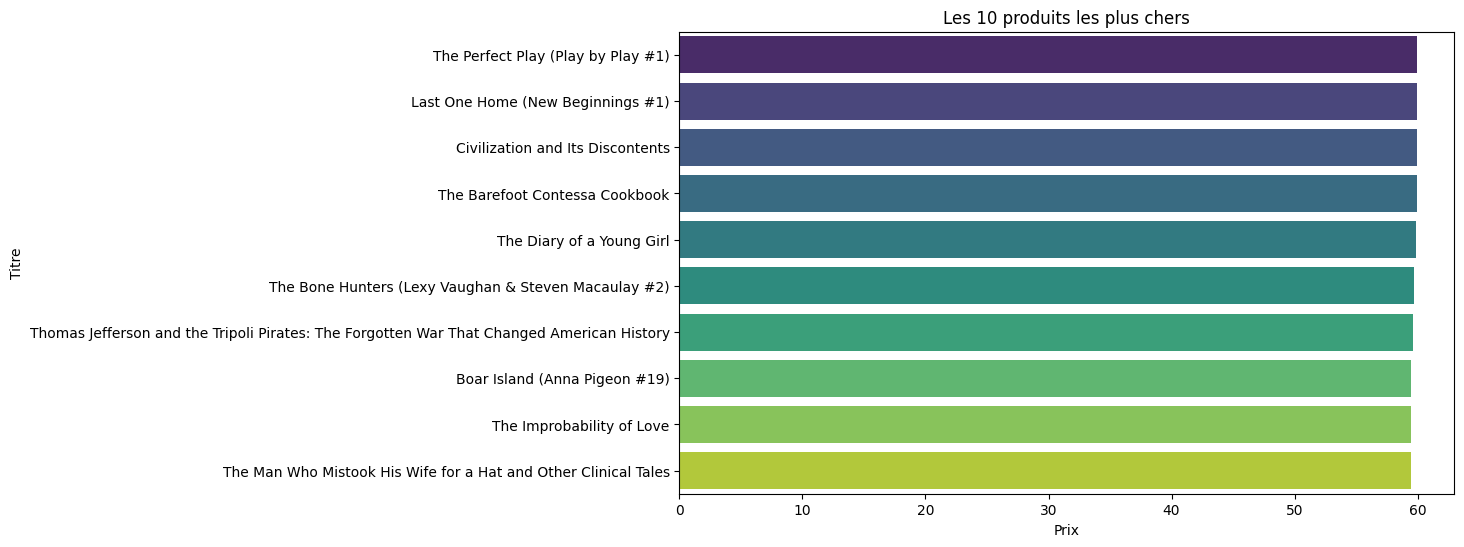

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='title', data=expensive_books, palette='viridis')
plt.title('Les 10 produits les plus chers')
plt.xlabel('Prix')
plt.ylabel('Titre')
plt.show()

/tmp/ipykernel_1061/334167508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='title', data=cheap_books, palette='viridis')


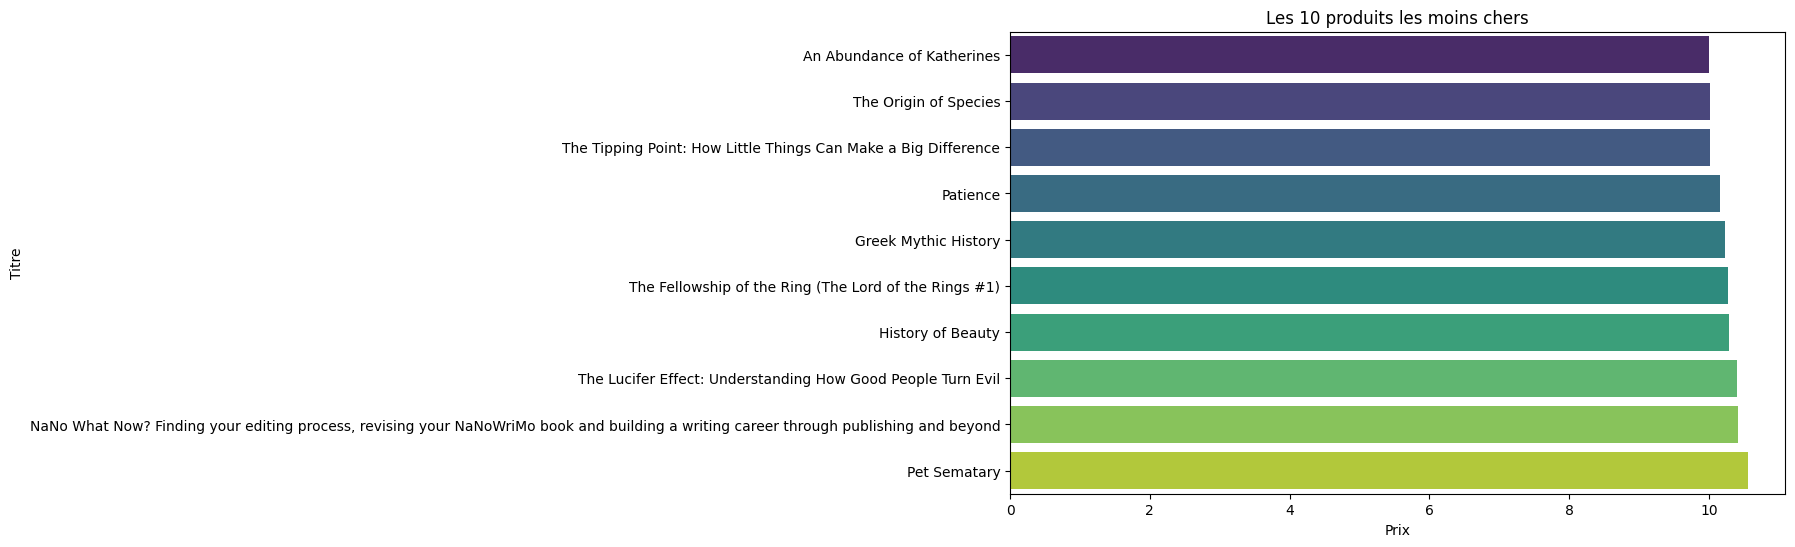

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='title', data=cheap_books, palette='viridis')
plt.title('Les 10 produits les moins chers')
plt.xlabel('Prix')
plt.ylabel('Titre')
plt.show()

/tmp/ipykernel_1061/3076988498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_products', y='category', data=top_categories, palette='viridis')


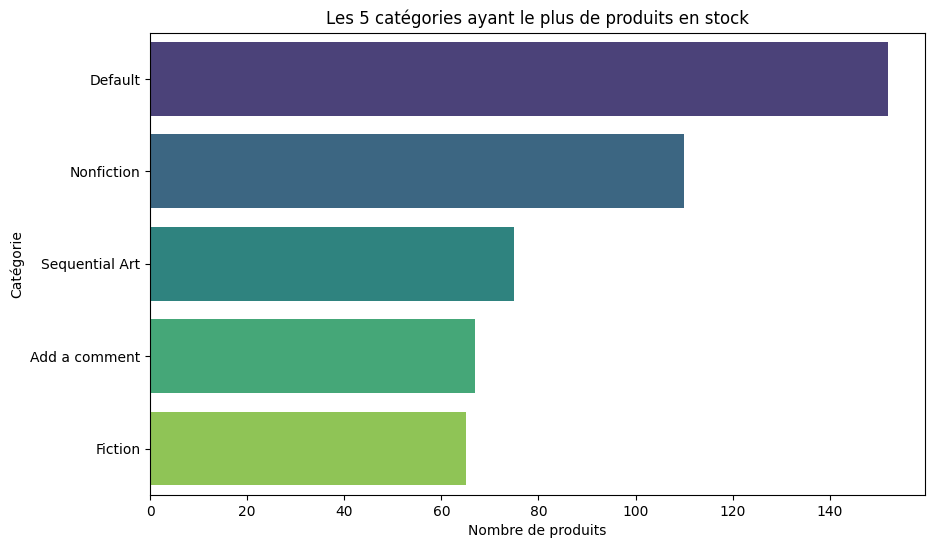

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_products', y='category', data=top_categories, palette='viridis')
plt.title('Les 5 catégories ayant le plus de produits en stock')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie')
plt.show()

/tmp/ipykernel_1061/1343196131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_price', y='category', data=expensive_categories, palette='viridis')


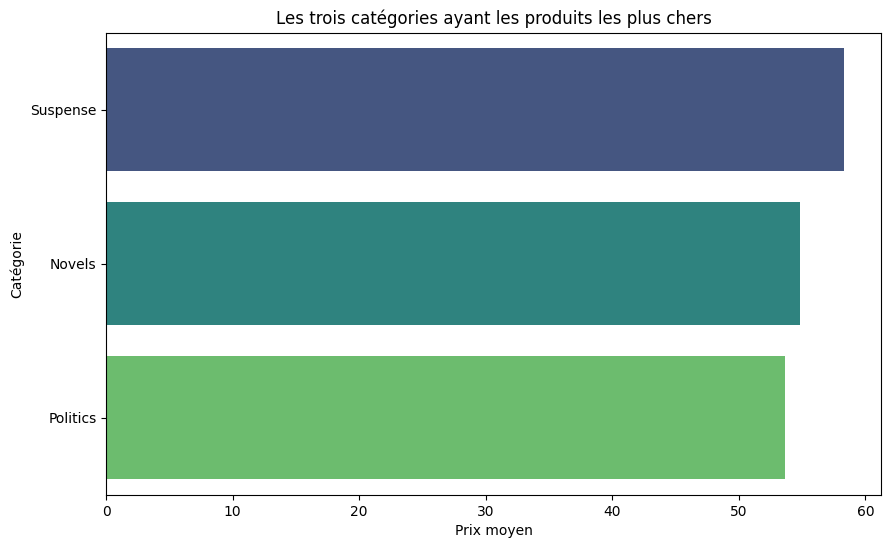

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='average_price', y='category', data=expensive_categories, palette='viridis')
plt.title('Les trois catégories ayant les produits les plus chers')
plt.xlabel('Prix moyen')
plt.ylabel('Catégorie')
plt.show()

/tmp/ipykernel_1061/3035400691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stars', y='number_of_books', data=star_counts, palette='viridis')


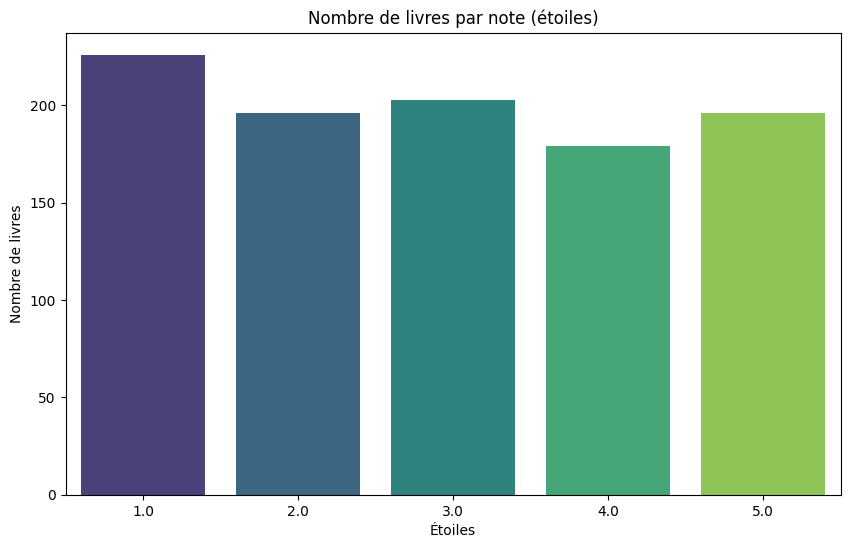

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x='stars', y='number_of_books', data=star_counts, palette='viridis')
plt.title('Nombre de livres par note (étoiles)')
plt.xlabel('Étoiles')
plt.ylabel('Nombre de livres')
plt.show()

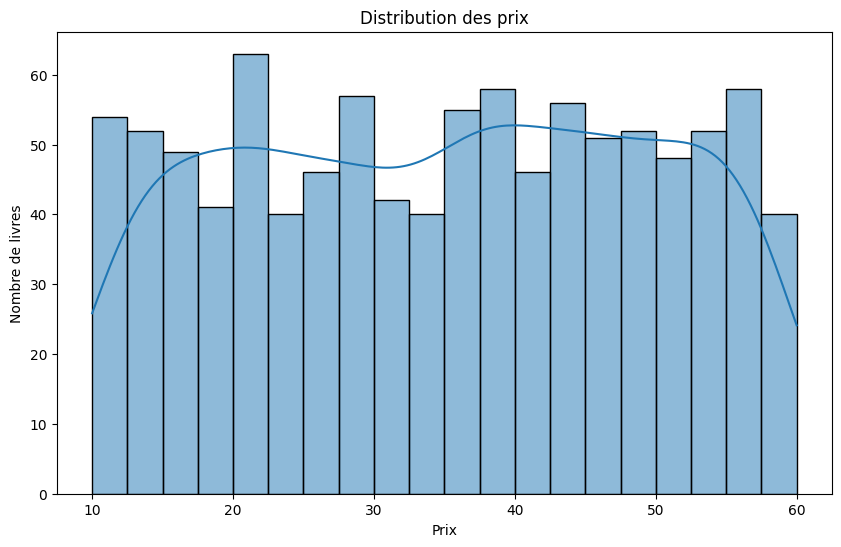

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de livres')
plt.show()


/tmp/ipykernel_1061/1167137664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='category', data=average_price_by_category, palette='viridis')


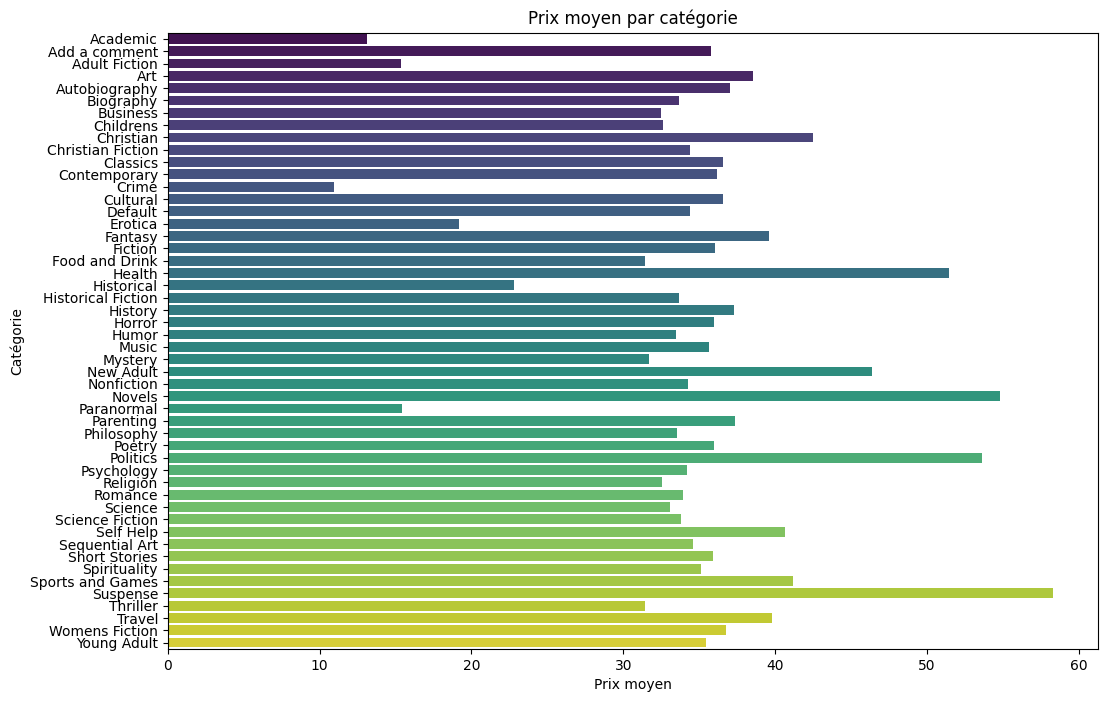

In [106]:
average_price_by_category = df.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='category', data=average_price_by_category, palette='viridis')
plt.title('Prix moyen par catégorie')
plt.xlabel('Prix moyen')
plt.ylabel('Catégorie')
plt.show()

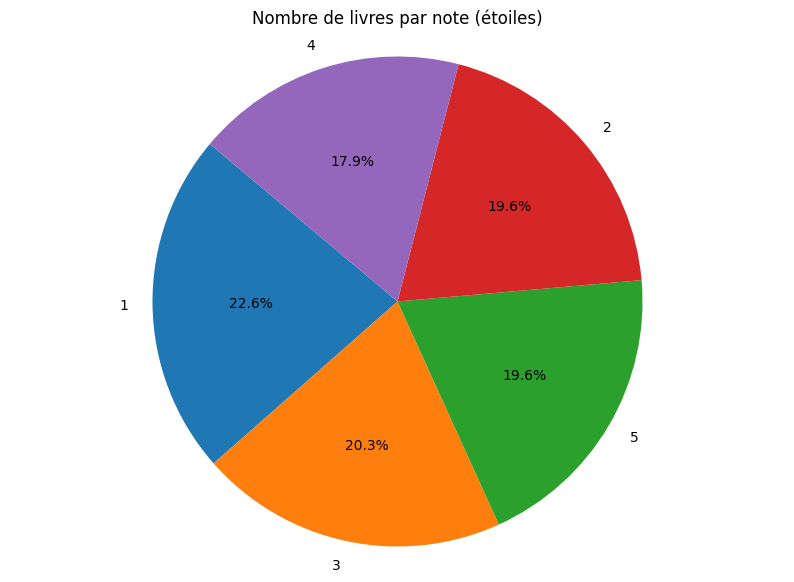

In [107]:
stars_counts = df['stars'].value_counts().reset_index()
stars_counts.columns = ['stars', 'number_of_books']

plt.figure(figsize=(10, 7))
plt.pie(stars_counts['number_of_books'], labels=stars_counts['stars'], autopct='%1.1f%%', startangle=140)
plt.title('Nombre de livres par note (étoiles)')
plt.axis('equal')  
plt.show()

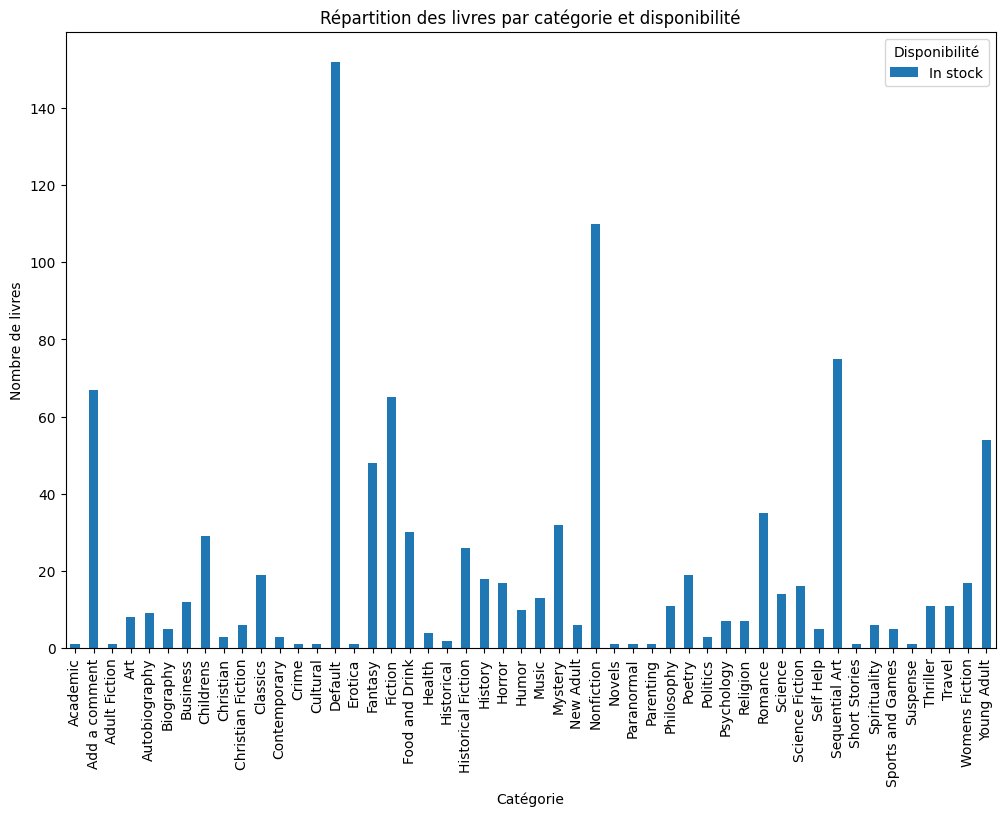

In [108]:
df_pivot = df.pivot_table(index='category', columns='availability', values='title', aggfunc='count').fillna(0)

df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Répartition des livres par catégorie et disponibilité')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.xticks(rotation=90)
plt.legend(title='Disponibilité')
plt.show()